In [51]:
import polars.selectors as cs
import numpy as np

import polars as pl

import matplotlib.pyplot as plt

In [52]:
index_cols = {
    1: ['l_returnflag', 'l_linestatus'],
    3: ['l_orderkey','o_orderdate','o_shippriority'],
    4: ['o_orderpriority'],
    5: ['n_name'],
    6: [],
    7: ['supp_nation', 'cust_nation', 'l_year'], 
    8: ['o_year'],
    9: ['nation', 'o_year'],
    10: ['c_custkey', 'c_name', 'c_acctbal', 'c_phone', 'n_name', 'c_address', 'c_comment'],
    12: ['l_shipmode'],
    13: ['c_count'],
    14: [],
    
    17: [],
    19: [],
    20: [],
    21: ['s_name'],
    22: ['cntrycode']
}
scale_required = set([4, 5, 6, 7, 9, 12, 13, 17, 19, 21, 22])

queries_to_run = [4]

In [53]:
def graph_query14(full_df):
    print("Q14!")
    fig, ax = plt.subplots(figsize=(7.5, 2.5))

    xs = [np.log2(x) for x in full_df['mi']]
    y = full_df['pct_diff_promo_revenue']
    print(y.to_list())
    ax.plot(xs, y.to_list(), linestyle='dotted', markersize=10, mew=1.5)

    ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
    ax.set_ylabel(f'Relative Error (%)', fontsize=14)
    ax.set_title(f'Approximating Promo Revenue Percentage', fontsize=16)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figs/q14_order_results.png')
    
def graph_query12(full_df):
    print("Q12")
    fig, axes = plt.subplots(2, 1, figsize=(7.5, 5), sharex=True)
    for ind, key in enumerate(['pct_diff_high_line_count', 'pct_diff_low_line_count']):
        names = ["High", "Low"]
        ax = axes[ind]

        priorities = full_df['l_shipmode'].unique().sort()

        for priority in priorities:
            group_data = full_df.filter(pl.col('l_shipmode') == priority).sort('mi')
            xs = [np.log2(x) for x in group_data['mi']]
            y = group_data[f'pct_diff_{names[ind].lower()}_line_count']
            ax.plot(xs, y.to_list(),linestyle='dotted', markersize=10, mew=1.5,
                label=f'Ship Mode: {priority}'
            )
            print('priority')
            print(y.to_list())

        ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
        ax.set_ylabel(f'Relative Error (%)', fontsize=14)
        ax.set_title(f'Approximating {names[ind]} Line Count', fontsize=16)
        ax.legend(fontsize=14)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('figs/q12_order_results.png')

In [54]:
def graph_query4(full_df):
    print("Q4!")
    fig, ax = plt.subplots(figsize=(7.5, 2.5))
    priorities = full_df['o_orderpriority'].unique().sort()
    labels = ["PAC", "DP"]

    xs = [np.log2(x) for x in full_df['mi'].unique().sort().to_list()]
    for priority in priorities:
        group_data = full_df.filter(pl.col('o_orderpriority') == priority).sort('mi')

        y = group_data['pct_diff_order_count']
        ax.plot(xs, y.to_list(), linestyle='dotted',
            label=f'Priority: {priority}', markersize=10, mew=1.5
        )
        print(priority, y.to_list())

    ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
    ax.set_ylabel(f'Relative Error (%)', fontsize=14)
    ax.set_title(f'Approximating Order Count Difference Percentage', fontsize=16)
    ax.legend()
    ax.grid(True, alpha=0.3)
#     plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)  # hspace controls vertical spacing
    plt.savefig('figs/q4_order_results.png', bbox_inches='tight')

In [55]:
def graph_query(full_df, query_ind):
    if query_ind == 1:
        graph_query1(full_df)
    if query_ind == 14:
        graph_query14(full_df)
    if query_ind == 4:
        graph_query4(full_df)
    if query_ind == 12:
        graph_query12(full_df)

Q4!
1-URGENT [21.59351693048844, 15.868273099001566, 10.878785219906485, 8.00897322199289, 6.0762645654040295, 4.766861139015593, 3.8101974279250688, 3.337236207045274, 3.0036925085048822, 2.897121305420026]
2-HIGH [19.55845401484478, 14.321516247995365, 10.446604491272073, 7.4667159543247354, 5.694063609593246, 4.347878216009123, 3.5531846372386133, 3.1484694471403336, 2.782405065890004, 2.662862580359931]
3-MEDIUM [19.40115674272051, 13.411045657889558, 9.981184255581658, 6.998198969248184, 5.058800142776873, 4.130794279840482, 3.3885268776460036, 2.8494549549999983, 2.7050478568742693, 2.469558155982988]
4-NOT SPECIFIED [18.671141479123882, 13.825899028442313, 9.399134462807565, 6.898800958552205, 5.3574150237519635, 3.906288277232945, 3.449040967909668, 2.9028893703076415, 2.6510878533820197, 2.5071963738425684]
5-LOW [18.112588972302742, 12.902026347447132, 8.718972477575116, 6.572477572775555, 4.9330029413209, 3.7627211478122757, 3.2036009824157246, 2.824221740206718, 2.610417961

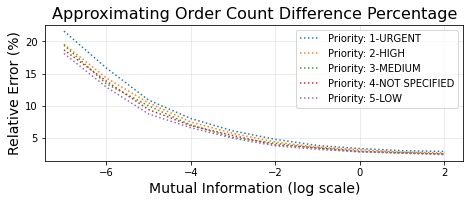

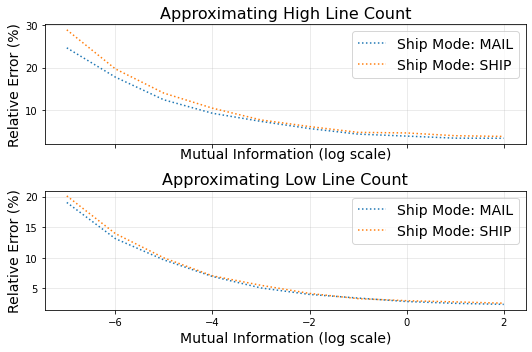

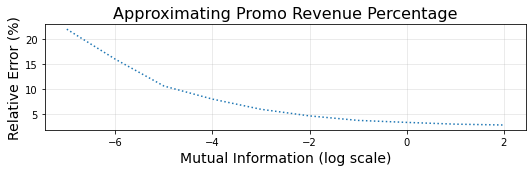

In [56]:
for priv_unit in ['orders']:
    for query_ind in [4, 12, 14]:
        full_df = pl.DataFrame()
        for mi in [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]:
            null_info = {}
            orig = pl.read_csv(f'unnoised/q{query_ind}.csv')
            if query_ind == 22:
                orig = orig.select(
                pl.col("cntrycode").cast(str),
                pl.col("numcust"),
                pl.col("totacctbal"))
            if query_ind == 10:
                orig = orig.select(
                    pl.col("c_custkey"), pl.col("c_name"),
                    pl.col("c_acctbal").cast(str),
                    pl.col("n_name"), pl.col("c_address"), pl.col("c_phone"), pl.col("c_comment")
                )
            noised = pl.read_json(f'outputs/ap-duckdb-q{query_ind}-{priv_unit}-{mi}-step3/output.json')
            if index_cols[query_ind]:
                merged_df = orig.join(noised, on=index_cols[query_ind], suffix='_noised')
            else:
                merged_df = orig.join(noised, suffix='_noised', how='cross')
            suffix1 = ''
            suffix2 = '_noised'
            cols_with_suffixes = [col for col in merged_df.columns if suffix1 in col or suffix2 in col]

            base_names = set([col.replace(suffix1, '').replace(suffix2, '') for col in cols_with_suffixes])
            for base_name in base_names:
                nulls_exist = False
                null_inds, null_vals = [], []

                orig = base_name + suffix1
                noised = base_name + suffix2
                if orig in merged_df.columns and noised in merged_df.columns:
                    rel_errors = []
                    for ind in range(len(merged_df[orig])):
                        if query_ind in scale_required:
                            const = 2 # subsampling scaling
                        else:
                            const = 1
        #                     print(merged_df[noised][ind])
                        new = np.average(
                            [100*abs(
                                const*merged_df[noised][ind][tmp_ind] - merged_df[orig][ind]
                                ) / merged_df[orig][ind] for tmp_ind in range(
                                    len(merged_df[noised][ind]))]
                        )
                        rel_errors.append(new)
                    merged_df = merged_df.with_columns(pl.Series('pct_diff_' + base_name, rel_errors))
                    merged_df = merged_df.with_columns(pl.Series('mi', [mi]*len(rel_errors)))
            full_df = pl.concat([full_df, merged_df])
        graph_query(full_df, query_ind)